In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/datas/airport-codes.csv')
df.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [44]:
len(df)

57421

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57421 entries, 0 to 57420
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ident         57421 non-null  object 
 1   type          57421 non-null  object 
 2   name          57421 non-null  object 
 3   elevation_ft  49608 non-null  float64
 4   continent     28978 non-null  object 
 5   iso_country   57175 non-null  object 
 6   iso_region    57421 non-null  object 
 7   municipality  51527 non-null  object 
 8   gps_code      41561 non-null  object 
 9   iata_code     9225 non-null   object 
 10  local_code    30030 non-null  object 
 11  coordinates   57421 non-null  object 
dtypes: float64(1), object(11)
memory usage: 5.3+ MB


In [46]:
df['type'].value_counts()

small_airport     34808
heliport          12028
medium_airport     4537
closed             4378
seaplane_base      1030
large_airport       616
balloonport          24
Name: type, dtype: int64

Since there's not much data it would be better to over sample it later in the preprocess stage

In [47]:
df.isnull().sum()

ident               0
type                0
name                0
elevation_ft     7813
continent       28443
iso_country       246
iso_region          0
municipality     5894
gps_code        15860
iata_code       48196
local_code      27391
coordinates         0
dtype: int64

In [48]:
df[['ISO_Country','ISO_state']] = df['iso_region'].str.split('-',n=1, expand=True)

Since we made a new column for iso_region, we can dop these columns

In [49]:
df.drop(['iso_country','iso_region'], axis= 1, inplace=True)

In [50]:
df.head()

,ident,type,name,elevation_ft,continent,municipality,gps_code,iata_code,local_code,coordinates,ISO_Country,ISO_state
0,00A,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125",US,PA
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022",US,KS
2,00AK,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968",US,AK
3,00AL,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172",US,AL
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,NaN,"-91.254898, 35.6087",US,AR


we would have to do the same for coordination

In [51]:
df[['Longitude','Latitude']] = df['coordinates'].str.split(',',n=1,expand=True)

In [52]:
df.drop(['coordinates'],axis=1,inplace=True)

In [53]:
df.head()

,ident,type,name,elevation_ft,continent,municipality,gps_code,iata_code,local_code,ISO_Country,ISO_state,Longitude,Latitude
0,00A,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,NaN,00A,US,PA,-74.93360137939453,40.07080078125
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,NaN,00AA,US,KS,-101.473911,38.704022
2,00AK,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,NaN,00AK,US,AK,-151.695999146,59.94919968
3,00AL,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,NaN,00AL,US,AL,-86.77030181884766,34.86479949951172
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,NaN,US,AR,-91.254898,35.6087


In [54]:
df.isnull().sum()

ident               0
type                0
name                0
elevation_ft     7813
continent       28443
municipality     5894
gps_code        15860
iata_code       48196
local_code      27391
ISO_Country         0
ISO_state           0
Longitude           0
Latitude            0
dtype: int64

In [55]:
len(df)

57421

Since we already have coordinates and the state names, we dont need iata code which is the location identification code.

In [56]:
df.drop(['iata_code'], axis = 1, inplace=True)

In [57]:
df.head()

,ident,type,name,elevation_ft,continent,municipality,gps_code,local_code,ISO_Country,ISO_state,Longitude,Latitude
0,00A,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,00A,US,PA,-74.93360137939453,40.07080078125
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,00AA,US,KS,-101.473911,38.704022
2,00AK,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,00AK,US,AK,-151.695999146,59.94919968
3,00AL,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,00AL,US,AL,-86.77030181884766,34.86479949951172
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,US,AR,-91.254898,35.6087


In [58]:
df['ident'].value_counts()

KKI        1
XA22       1
UA-0056    1
MX-0381    1
MNP        1
          ..
LFJL       1
5Z4        1
TWH        1
CA-0206    1
MGRB       1
Name: ident, Length: 57421, dtype: int64

we can see that ident is a primary key column so we can drop that as well. 

In [59]:
df.drop(['ident'], axis = 1, inplace=True)

In [60]:
df.head()

,type,name,elevation_ft,continent,municipality,gps_code,local_code,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,00A,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,00AA,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,00AK,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,00AL,US,AL,-86.77030181884766,34.86479949951172
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,US,AR,-91.254898,35.6087


lets try to fill up NA values

In [61]:
m = df['elevation_ft'].isna()

In [62]:
h_elevation_ft = df[df['type'] == 'heliport']['elevation_ft'].mean()
sa_elevation_ft = df[df['type'] == 'small_airport']['elevation_ft'].mean()
ma_elevation_ft = df[df['type'] == 'medium_airport']['elevation_ft'].mean()
c_elevation_ft = df[df['type'] == 'closed']['elevation_ft'].mean()
sb_elevation_ft = df[df['type'] == 'seaplane_base']['elevation_ft'].mean()
la_elevation_ft = df[df['type'] == 'large_airport']['elevation_ft'].mean()
b_elevation_ft = df[df['type'] == 'balloonport']['elevation_ft'].mean()

In [63]:
df.loc[m,'elevation_ft'] = np.where(df.loc[m, 'type'].eq('heliport'), h_elevation_ft,h_elevation_ft)
df.loc[m,'elevation_ft'] = np.where(df.loc[m, 'type'].eq('small_airport'), sa_elevation_ft,sa_elevation_ft)
df.loc[m,'elevation_ft'] = np.where(df.loc[m, 'type'].eq('medium_airport'), ma_elevation_ft,ma_elevation_ft)
df.loc[m,'elevation_ft'] = np.where(df.loc[m, 'type'].eq('closed'), c_elevation_ft,c_elevation_ft)
df.loc[m,'elevation_ft'] = np.where(df.loc[m, 'type'].eq('seaplane_base'), sb_elevation_ft,sb_elevation_ft)
df.loc[m,'elevation_ft'] = np.where(df.loc[m, 'type'].eq('large_airport'), la_elevation_ft,la_elevation_ft)
df.loc[m,'elevation_ft'] = np.where(df.loc[m, 'type'].eq('balloonport'), b_elevation_ft,b_elevation_ft)

<AxesSubplot:xlabel='type', ylabel='elevation_ft'>

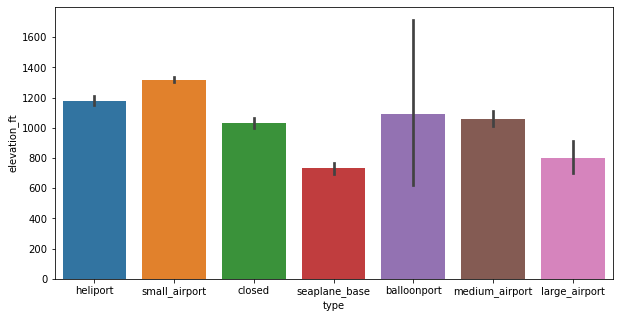

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'type', y = 'elevation_ft', data = df)

In [65]:
df.isnull().sum()

type                0
name                0
elevation_ft        0
continent       28443
municipality     5894
gps_code        15860
local_code      27391
ISO_Country         0
ISO_state           0
Longitude           0
Latitude            0
dtype: int64

In [66]:
df['municipality'].value_counts()

Seoul                403
SÃ£o Paulo           243
Busan                135
Houston              120
Los Angeles          100
                    ... 
Reims/Champagne        1
Goianira               1
Tuscumbia              1
East Windsor Hill      1
Zdanovo                1
Name: municipality, Length: 27893, dtype: int64

In [67]:
df['continent'].value_counts()

SA    8443
EU    8404
AS    5619
AF    3361
OC    3123
AN      28
Name: continent, dtype: int64

In [68]:
print(len(df['gps_code'].unique()))
print(len(df['local_code'].unique()))

40843
28653


gps_cood and loca_code aren't really useful. We can drop these columns.

If I label encode thse in the future, there owuld be too many columns

In [69]:
df.drop(['gps_code','local_code'], axis= 1, inplace =True)

In [70]:
df.head()

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NaN,Bensalem,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NaN,Anchor Point,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NaN,Harvest,US,AL,-86.77030181884766,34.86479949951172
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,US,AR,-91.254898,35.6087


In [71]:
df.isnull().sum()

type                0
name                0
elevation_ft        0
continent       28443
municipality     5894
ISO_Country         0
ISO_state           0
Longitude           0
Latitude            0
dtype: int64

So all the US has missing values with NaN.

In [72]:
df['continent'].fillna('A',inplace=True)

I filled up NAs with A (temporarily)

In [73]:
m = df['ISO_Country'] == 'US'

In [74]:
c = df['ISO_Country'] == 'CA'

In [75]:
mx = df['ISO_Country'] == 'MX'

In [76]:
hn = df['ISO_Country'] == 'HN'

In [77]:
cu = df['ISO_Country'] == 'CU'

In [78]:
cr = df['ISO_Country'] == 'CR'

In [79]:
gl = df['ISO_Country'] == 'GL'

In [80]:
df.loc[m,'continent'] = df.loc[m,'continent'].replace('A','NA')

In [81]:
df.loc[c,'continent'] = df.loc[c,'continent'].replace('A','NA')

In [82]:
df.loc[mx,'continent'] = df.loc[mx,'continent'].replace('A','NA')

In [83]:
df.loc[hn,'continent'] = df.loc[hn,'continent'].replace('A','CA')

In [84]:
df.loc[cu,'continent'] = df.loc[cu,'continent'].replace('A','NA')

In [85]:
df.loc[cr,'continent'] = df.loc[cr,'continent'].replace('A','NA')

In [86]:
df.loc[gl,'continent'] = df.loc[gl,'continent'].replace('A','NA')

In [87]:
df['continent'].value_counts()

NA    27804
SA     8443
EU     8404
AS     5619
AF     3361
OC     3123
A       481
CA      158
AN       28
Name: continent, dtype: int64

We changed all the A to NA - North America.

And other countries and continents as well

While I'm filling up the data I found that there's a country labeled as PA which I would have to drop this since it is a data error.

There are other countries that can be labeled into certain continents but since there's not even 100 data for each of the countries, I will drop all of them.

In [88]:
df[df['continent'] == 'A']['ISO_Country'].value_counts()

PA    71
BS    65
PR    62
GT    54
DO    39
NI    32
SV    27
BZ    27
JM    24
VI     9
TC     8
HT     8
VC     6
GP     6
VG     4
BQ     3
GD     3
AG     3
TT     3
KY     3
BM     3
KN     2
PM     2
BB     2
MS     2
DM     2
LC     2
MF     2
SX     1
AI     1
BL     1
AW     1
GB     1
CW     1
MQ     1
Name: ISO_Country, dtype: int64

In [89]:
df_2 = df[df.continent != 'A']
df_2.head()

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.77030181884766,34.86479949951172
4,closed,Newport Hospital & Clinic Heliport,237.0,NA,Newport,US,AR,-91.254898,35.6087


<AxesSubplot:>

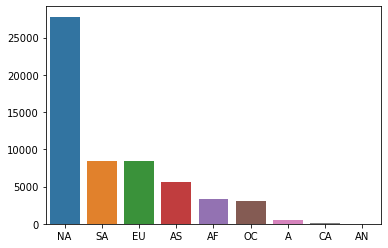

In [90]:
sns.barplot(x = df.continent.value_counts().index, y = df.continent.value_counts().values, data=df)

In [91]:
df.head()

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.77030181884766,34.86479949951172
4,closed,Newport Hospital & Clinic Heliport,237.0,NA,Newport,US,AR,-91.254898,35.6087


<AxesSubplot:xlabel='type', ylabel='elevation_ft'>

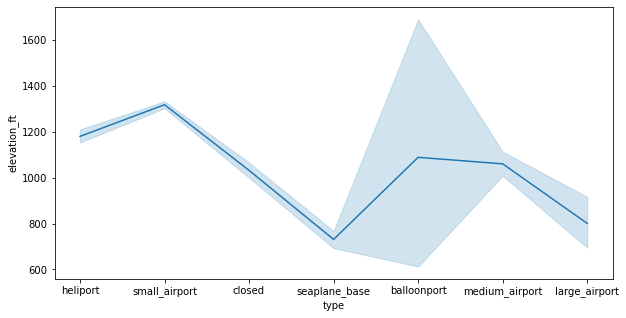

In [92]:
plt.figure(figsize=(10,5))
sns.lineplot(x= 'type' , y = 'elevation_ft', data= df)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of elevation')

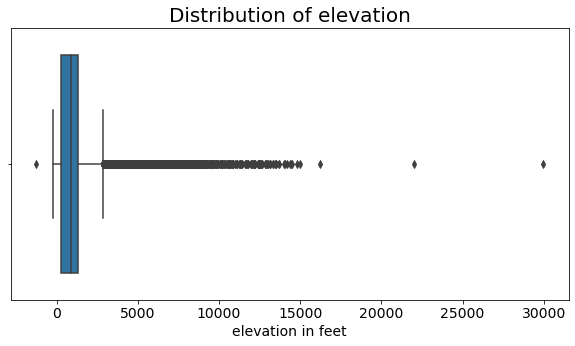

In [93]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(df.elevation_ft)

# notation indicating an outlier
# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('elevation in feet', fontsize=14)
plt.title('Distribution of elevation', fontsize=20)

In [94]:
df[df['elevation_ft'] > 25000]

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
55049,medium_airport,Modi,29977.0,NA,California,US,CA,179.999894,89.999845


The elevation_ft 29977.0 is an outlier because according to google, 
The Leadville Airport is North America's highest public use airport at an altitude of 9,934 feet.

I can not find anything about the elevation feet for modi airport. So I will drop this.

In [95]:
df.drop([55049], axis=0, inplace=True)

In [96]:
df[df['elevation_ft'] > 20000]

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
25164,heliport,Siachen Glacier AFS Airport,22000.0,AS,NaN,IN,JK,77,35.5


In [97]:
df.head()

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.77030181884766,34.86479949951172
4,closed,Newport Hospital & Clinic Heliport,237.0,NA,Newport,US,AR,-91.254898,35.6087


In [98]:
def describe(data, col):
    max_v = data[col].max()
    min_v = data[col].min()
    median_v = data[col].median()
    mean_v = data[col].mean()
    return "Max: {}".format(max_v), "Min: {}".format(min_v), "Median: {}".format(median_v), "Mean: {}".format(mean_v)
    

In [99]:
describe(df,'elevation_ft')

('Max: 22000.0', 'Min: -1266.0', 'Median: 892.0', 'Mean: 1230.5058690351793')

In [100]:
below_avg = []
above_avg = []
for val in df['elevation_ft']:
    if val > 1231:
        above_avg.append(val)
    else:
        below_avg.append(val)

In [101]:
print(len(below_avg))
len(above_avg)

42202


15218

Seems like people build airports in lower elevated place than higher. Why is this?

Text(0.5, 1.0, 'elevation_feet per type')

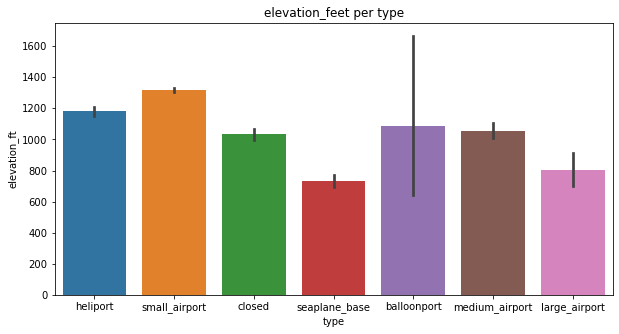

In [102]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'type', y = 'elevation_ft', data=df)
plt.title('elevation_feet per type')

In [103]:
df['Longitude'].astype(str).astype(float)
df['Latitude'].astype(str).astype(float)

0        40.070801
1        38.704022
2        59.949200
3        34.864799
4        35.608700
           ...    
57416    40.542524
57417    41.784401
57418    51.894444
57419   -11.584278
57420    30.784722
Name: Latitude, Length: 57420, dtype: float64

In [104]:
sns.jointplot(x="Longitude", y="Latitude", hue="ISO_Country", data= df)

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

Error in callback <function flush_figures at 0x7fb4674cb0d0> (for post_execute):


KeyboardInterrupt: 

In [105]:
df.isnull().sum()

type               0
name               0
elevation_ft       0
continent          0
municipality    5894
ISO_Country        0
ISO_state          0
Longitude          0
Latitude           0
dtype: int64

Not an outlier

In [106]:
df[df['municipality'].isnull()]

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
1550,heliport,Watertown / Brownlee Heliport,1720.0,NA,NaN,US,SD,-97.1080899239,44.883264878199995
2459,heliport,Nordman / Phillabaum Heliport,2440.0,NA,NaN,US,ID,-116.871174574,48.631483378700004
4417,seaplane_base,Peru / Destiny Cove SPB,580.0,NA,NaN,US,ME,-70.396957,44.460597
7690,small_airport,Zadow Airstrip,1089.0,NA,NaN,US,TX,-95.954353809,29.991738550900003
7926,small_airport,Gun Barrel City Airpark,385.0,NA,NaN,US,TX,-96.1456650496,32.3551499558
...,...,...,...,...,...,...,...,...,...
57358,small_airport,Sengwa Research Area Airstrip,1089.0,AF,NaN,ZW,MN,28.215618,-18.165196
57359,small_airport,Gokwe North Airport,1089.0,AF,NaN,ZW,MI,28.330871,-17.537114
57362,small_airport,Chipinge Farm Airstrip,1089.0,AF,NaN,ZW,MV,32.203607,-20.460575
57363,small_airport,Turwi River Airstrip,1089.0,AF,NaN,ZW,MV,32.10904,-20.395009


In [107]:
ar_1 = df['municipality'].value_counts().values

In [108]:
z=0
for i in ar_1:
    if i == 1:
        z+= 1
z       

20672

In [109]:
df.drop(['name','municipality'], axis=1)

,type,elevation_ft,continent,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,11.0,NA,US,PA,-74.93360137939453,40.07080078125
1,small_airport,3435.0,NA,US,KS,-101.473911,38.704022
2,small_airport,450.0,NA,US,AK,-151.695999146,59.94919968
3,small_airport,820.0,NA,US,AL,-86.77030181884766,34.86479949951172
4,closed,237.0,NA,US,AR,-91.254898,35.6087
...,...,...,...,...,...,...,...
57416,medium_airport,0.0,AS,CN,21,122.3586,40.542524
57417,medium_airport,1089.0,AS,CN,21,123.49600219726562,41.784400939941406
57418,heliport,40.0,EU,GB,ENG,1.4825,51.894444
57419,small_airport,11.0,AF,TF,U-A,47.296388888900005,-11.584277777799999


There are too many unqiue values for municipality column.

In [110]:
df.head()

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.77030181884766,34.86479949951172
4,closed,Newport Hospital & Clinic Heliport,237.0,NA,Newport,US,AR,-91.254898,35.6087


In [111]:
df.groupby('type')['elevation_ft'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
balloonport,24.0,1089.000000,1377.878205,37.0,322.50,940.0,1089.00,5624.0
closed,4378.0,1032.042257,1122.660771,-20.0,302.00,969.5,1089.00,9869.0
heliport,12028.0,1180.207017,1575.031127,-117.0,200.00,807.0,1089.00,22000.0
large_airport,616.0,800.896104,1370.086508,-11.0,59.00,276.0,869.25,10860.0
medium_airport,4536.0,1054.112213,1639.807787,-1266.0,85.00,426.0,1175.00,14472.0
seaplane_base,1030.0,731.175728,626.309253,-1.0,134.75,746.5,1089.00,6534.0
small_airport,34808.0,1318.311423,1503.557999,-210.0,367.00,976.5,1478.00,16200.0


In [112]:
df.head()

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.77030181884766,34.86479949951172
4,closed,Newport Hospital & Clinic Heliport,237.0,NA,Newport,US,AR,-91.254898,35.6087


seaplane_base and large_airport has lower elevation level

In [113]:
df.drop(df[df['type']=='closed'].index,inplace=True)

In [114]:
df.head()

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.77030181884766,34.86479949951172
5,small_airport,Fulton Airport,1100.0,NA,Alex,US,OK,-97.8180194,34.9428028


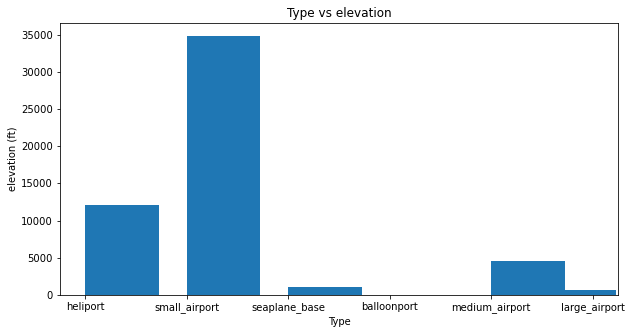

In [121]:
plt.figure(figsize=(10,5))
plt.hist(df['type'], width = 0.725, bins = 10)
plt.title('Type vs elevation')
plt.xlabel('Type')
plt.ylabel('elevation (ft)')
plt.show()

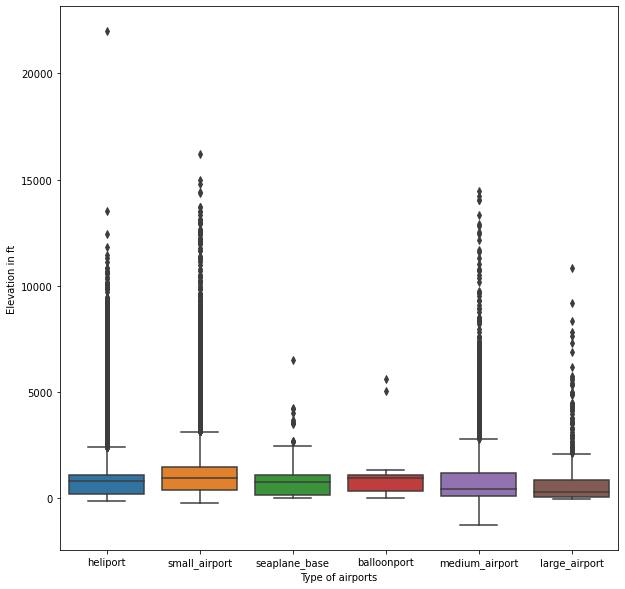

In [127]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'type', y = 'elevation_ft', data=df)
plt.xlabel('Type of airports')
plt.ylabel('Elevation in ft')
plt.show()

In [128]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1,len(data)+1)/len(data)
    return x,y

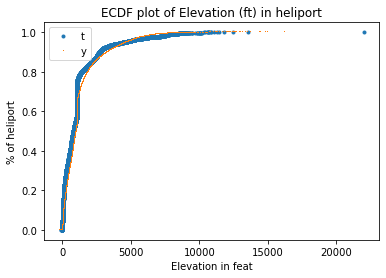

In [141]:
hx,hy = ecdf(df['elevation_ft'][df.type == 'heliport'])
smx,smy = ecdf(df['elevation_ft'][df.type == 'small_airport'])
plt.plot(hx,hy,marker='.',linestyle='none')
plt.plot(smx,smy, marker=',', linestyle = 'none')
plt.title('ECDF plot of Elevation (ft) in heliport')
plt.xlabel('Elevation in feat')
plt.ylabel('% of heliport')
plt.legend('type')
plt.show()

In [211]:
s = pd.Series(np.random.binomial(60,0.2,size=100000))
s.value_counts().sort_index

<bound method Series.sort_index of 12    12707
11    12680
13    11817
10    11116
14     9759
9      8711
15     7587
8      5962
16     5279
7      3641
17     3429
18     2028
6      1851
19     1186
5       777
20      560
4       311
21      267
22      143
3        77
23       61
2        20
24       19
1         5
25        3
26        3
27        1
dtype: int64>

In [255]:
from scipy.stats import poisson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x_rvs = pd.Series(poisson.rvs(1.2, size = 100000, random_state =2))
x_rvs

0        1
1        1
2        1
3        0
4        1
        ..
99995    2
99996    1
99997    2
99998    1
99999    0
Length: 100000, dtype: int64

In [216]:
data = x_rvs.value_counts().sort_index().to_dict()
data

{0: 30473, 1: 36084, 2: 21486, 3: 8565, 4: 2596, 5: 647, 6: 128, 7: 20, 8: 1}

In [218]:
range(len(data))

range(0, 9)

In [219]:
data.values()

dict_values([30473, 36084, 21486, 8565, 2596, 647, 128, 20, 1])

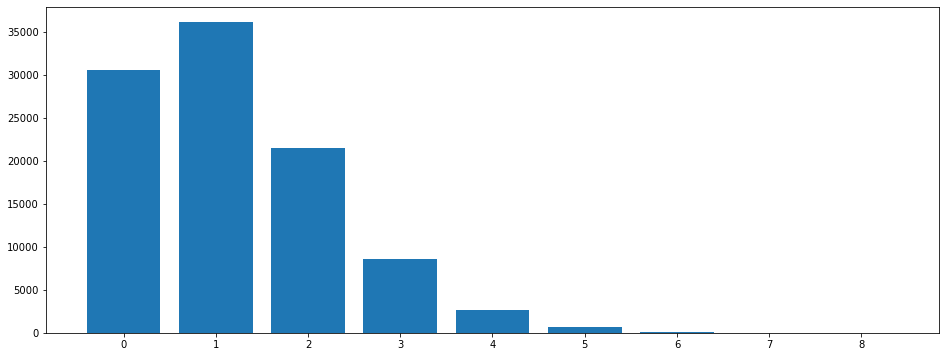

In [224]:
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), data.keys())
plt.show()

In [260]:
# Look at the poisson equation!
def poisson_pmf(k, lam):
    return ((lam**k - np.exp(-lam))/np.math.factorial(k))

In [291]:
251/200000

0.001255

In [292]:
poisson_pmf(0,0.001255)

0.0012542128168393507

In [228]:
n=[1,2,3]
b=['dad','mom','sister']

In [243]:
an = dict(zip(n,b))

In [256]:
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

Poisson:      10.0416 3.1269265165654274


In [258]:
samples_poisson.min()

1

In [248]:
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

{1: 'dad', 2: 'mom', 3: 'sister'}

In [277]:
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)


In [280]:
samples_binomial.mean()

10.0108

In [297]:
nnn= np.random.poisson(0.001255, size=200000)
nnn.mean()

0.0013

In [299]:
nn = np.random.binomial(100, 0.001255, size = 200000)
nn.mean()

0.12581

In [306]:
nohitter = np.random.poisson(215/155, 10000)

In [308]:
n_large = np.sum(nohitter>=7)
n_large/10000

0.0003

In [321]:
t2 = np.random.exponential(765, size=1)
t2

array([55.12644391])

In [315]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2


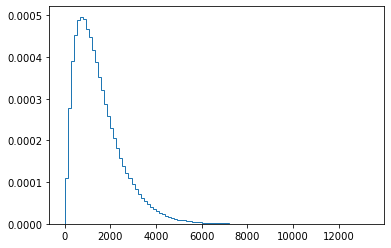

In [322]:
waiting_times = successive_poisson(764, 715, size = 1000000)
plt.hist(waiting_times, bins=100, histtype='step',density=True)
plt.show()